In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

from sklearn.cluster import KMeans
import wrangle_mall as w

In [2]:
iris = data('iris')

In [3]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.columns = [col.lower().replace('.','_') for col in iris.columns]

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


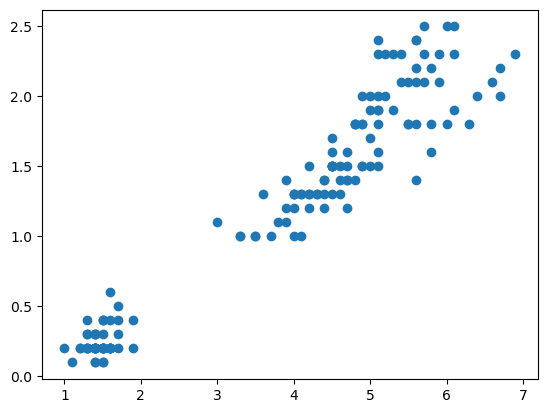

In [6]:
plt.scatter(data=iris, x='petal_length', y='petal_width')

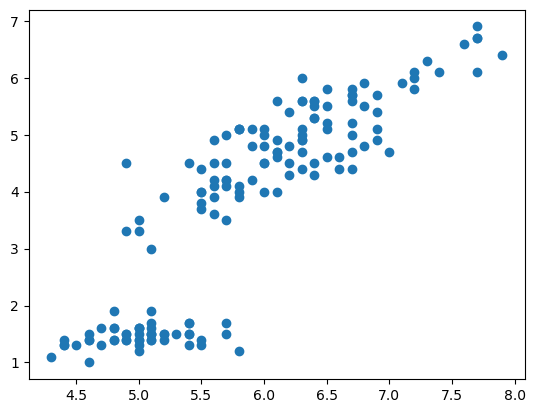

In [7]:
plt.scatter(data=iris, x='sepal_length', y='petal_length')

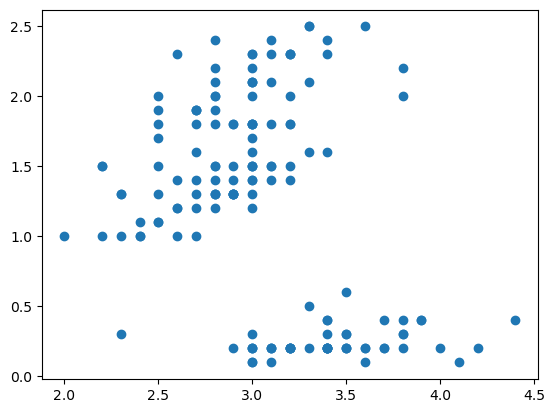

In [8]:
plt.scatter(data=iris, x='sepal_width', y='petal_width')

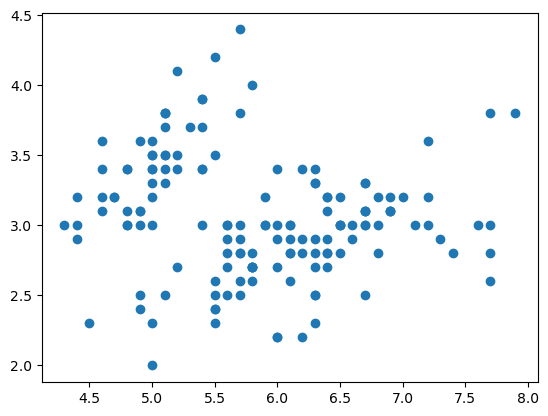

In [9]:
plt.scatter(data=iris, x='sepal_length', y='sepal_width')

In [10]:
train, val, test = w.split_data(iris)

In [12]:
scale_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
train_scaled, val_scaled, test_scaled = w.scale_data(train, val, test, scale_cols)

In [13]:
X_train = train_scaled.drop(columns=['species', 'sepal_width', 'petal_width'])
X_val = val_scaled.drop(columns=['species', 'sepal_width', 'petal_width'])
X_test = test_scaled.drop(columns=['species', 'sepal_width', 'petal_width'])

In [14]:
kmeans_2 = KMeans(n_clusters=2)
kmeans_2.fit(X_train)
clusters_2 = kmeans_2.predict(X_train)

In [16]:
train['clusters_2'] = clusters_2
train.clusters_2.sort_values().unique()

array([0, 1], dtype=int32)

In [17]:
kmeans_3 = KMeans(n_clusters=3)
kmeans_3.fit(X_train)
clusters_3 = kmeans_3.predict(X_train)

In [18]:
train['clusters_3'] = clusters_3
train.clusters_3.sort_values().unique()

array([0, 1, 2], dtype=int32)

In [19]:
kmeans_4 = KMeans(n_clusters=4)
kmeans_4.fit(X_train)
clusters_4 = kmeans_4.predict(X_train)

In [20]:
train['clusters_4'] = clusters_4
train.clusters_4.sort_values().unique()

array([0, 1, 2, 3], dtype=int32)

In [29]:
 train.clusters_2.unique()

array([0, 1], dtype=int32)

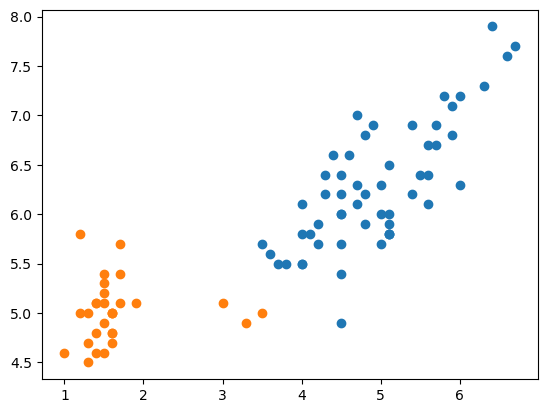

In [31]:
# plt.scatter(data=train, x='sepal_length', y='petal_length', hue='clusters_2')
# plt.show()

for cluster in train.clusters_2.unique():
    plt.scatter(train[train.clusters_2 == cluster].petal_length,
             train[train.clusters_2 == cluster].sepal_length,
               label=cluster)

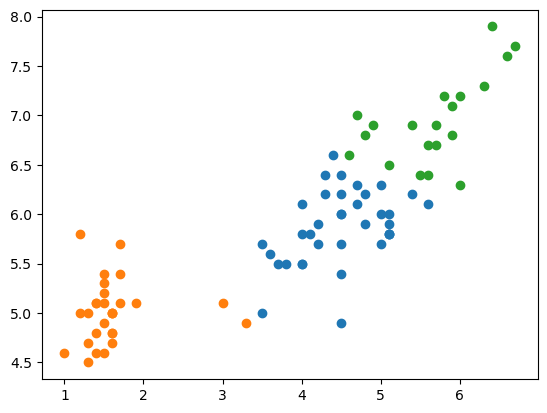

In [32]:
for cluster in train.clusters_3.unique():
    plt.scatter(train[train.clusters_3 == cluster].petal_length,
             train[train.clusters_3 == cluster].sepal_length,
               label=cluster)

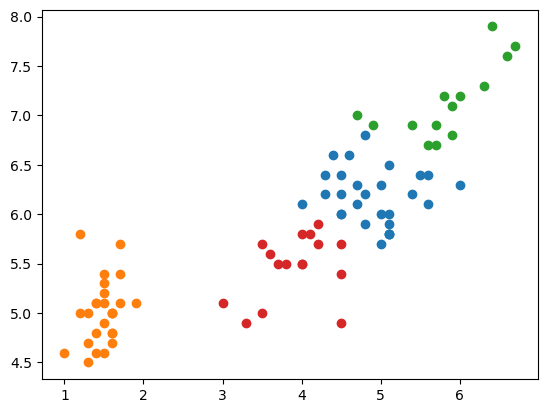

In [33]:
for cluster in train.clusters_4.unique():
    plt.scatter(train[train.clusters_4 == cluster].petal_length,
             train[train.clusters_4 == cluster].sepal_length,
               label=cluster)

In [34]:
# theyre convenient, I promise!
{k: KMeans(k).fit(X_train
                 ).inertia_ for k in range(2,15)}
# alternatively:
my_kmeans_dict = {}
for k in range(1,15):
    my_kmeans_dict[k] = KMeans(k).fit(X_train).inertia_

In [35]:
my_kmeans_dict

{1: 12.296374279529129,
 2: 3.4099328384910357,
 3: 1.687786553646437,
 4: 1.1325658747254428,
 5: 0.8814424460062298,
 6: 0.7608498475305644,
 7: 0.6146929564527082,
 8: 0.512120035837265,
 9: 0.43334678035470303,
 10: 0.37121601049984576,
 11: 0.29691852325080703,
 12: 0.2677498937459617,
 13: 0.22435642216433832,
 14: 0.21557414554787435}

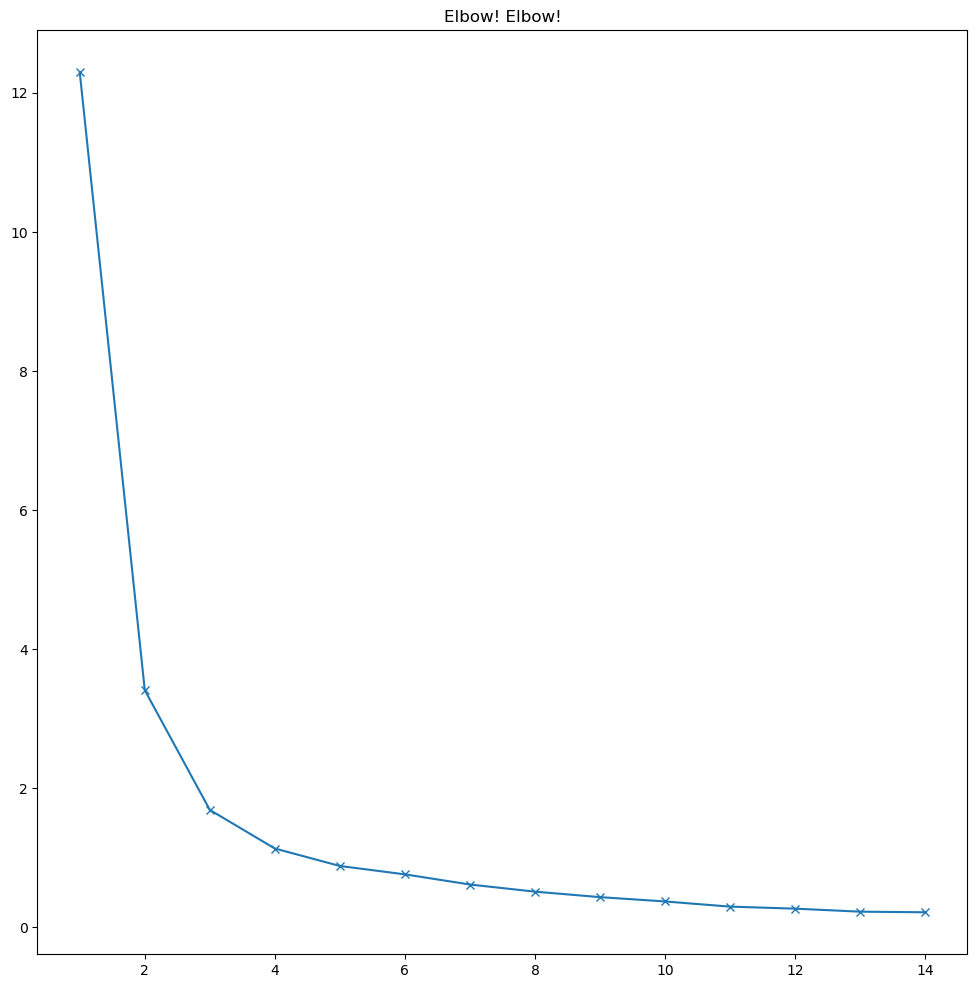

In [36]:
plt.figure(figsize=(12,12))
pd.Series(my_kmeans_dict).plot(marker='x')
plt.title('Elbow! Elbow!')
plt.show()

In [37]:
cols=['petal_length', 'sepal_length']

In [38]:
kmeans_3_unscaled = KMeans(n_clusters=3)
kmeans_3_unscaled.fit(train[cols])
clusters_3_unscaled = kmeans_3_unscaled.predict(train[cols])

In [40]:
train['clusters_3_unscaled'] = clusters_3_unscaled
train.clusters_3_unscaled.sort_values().unique()

array([0, 1, 2], dtype=int32)

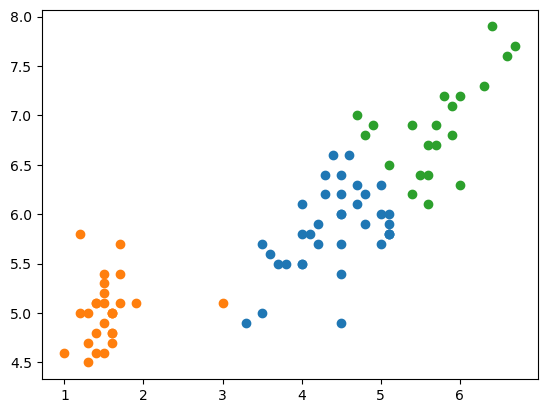

In [41]:
for cluster in train.clusters_3_unscaled.unique():
    plt.scatter(train[train.clusters_3_unscaled == cluster].petal_length,
             train[train.clusters_3_unscaled == cluster].sepal_length,
               label=cluster)